# Supervised Learning - Decision Tree and Random Forest Tree

### Build a decision tree & random forest model with population data and give and anaysis about the risky and non risky group of people. 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as skmet

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import the dataset
fraud_data = pd.read_csv(r"D:\360digi\DS\Sharath\Decision_Tree_2_Master_Class\handson\Datasets_DT\Fraud_check.csv")
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


## Data Preprocessing

In [5]:
fraud_data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
# Checking for Null values
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
(fraud_data['Taxable.Income'] > 30000).sum()

476

In [8]:
(fraud_data['Taxable.Income'] <= 30000).sum()

124

In [ ]:
# Y = fraud_data['Taxable.Income']

In [9]:
fraud_data['target'] = np.where(fraud_data['Taxable.Income'] > 30000, 'Good', fraud_data['Taxable.Income'] )
fraud_data['target'] = np.where(fraud_data['target'] <= '30000', 'Risky', fraud_data['target'] )

In [10]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [11]:
fraud_data['target'].unique()

array(['Good', 'Risky'], dtype=object)

In [12]:
fraud_data['target'].value_counts()

Good     476
Risky    124
Name: target, dtype: int64

In [13]:
# Data split into Input and Output

df_X = fraud_data.iloc[:, [0,1,3,4,5]]
df_X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [14]:
Y = fraud_data['target']
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: target, Length: 600, dtype: object

#### Separating Numeric and Non-Numeric columns

In [15]:
numeric_data = df_X.select_dtypes(exclude = ['object']).columns
numeric_data

Index(['City.Population', 'Work.Experience'], dtype='object')

In [16]:
cate_data = df_X.select_dtypes(include = ['object']).columns
cate_data

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

#### Outlier Analysis

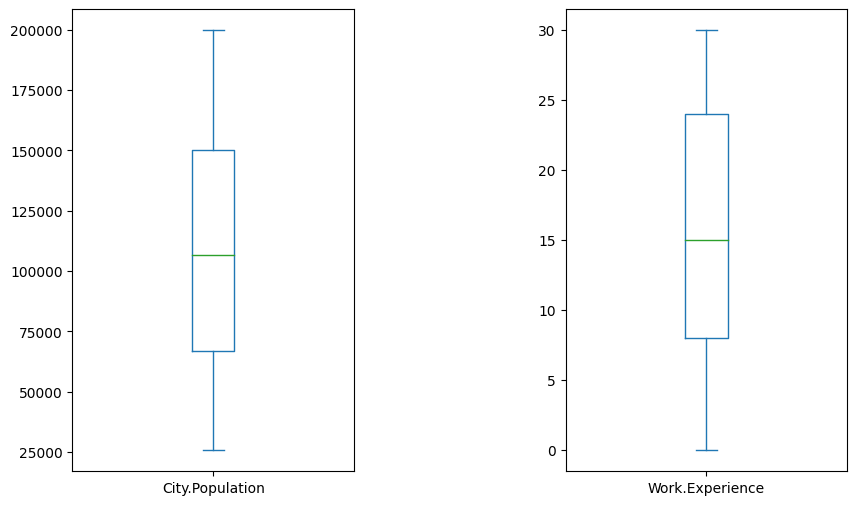

In [17]:
#Box plot visualization to view the outliers.

df_X[numeric_data].plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))

plt.subplots_adjust(wspace = 0.75)
plt.show()

# No outliers

#### Scaling with Normalization - MinMaxScaler

In [18]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

In [19]:
processed_pipeline = ColumnTransformer([('scale', scale_pipeline, numeric_data)])

In [20]:
processed = processed_pipeline.fit(df_X)
processed

ColumnTransformer(transformers=[('scale',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 Index(['City.Population', 'Work.Experience'], dtype='object'))])

In [21]:
data_norm = pd.DataFrame(processed.transform(df_X))
data_norm

,0,1
0,0.139472,0.333333
1,0.622394,0.600000
2,0.772568,1.000000
3,0.962563,0.500000
4,0.010081,0.933333
...,...,...
595,0.078811,0.233333
596,0.170058,0.066667
597,0.737240,0.000000
598,0.886810,0.566667


In [22]:
cate_data

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

#### Convert Categorical data to Numerical data using OneHotEncoder

In [23]:
fraud_data['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [24]:
fraud_data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [25]:
fraud_data['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [26]:
categ_pipeline = Pipeline([('onehot', OneHotEncoder())])

In [27]:
preprocess_pipeline2 = ColumnTransformer([('categorical', categ_pipeline, cate_data)])

In [28]:
processed2 = preprocess_pipeline2.fit(df_X)

In [29]:
encode_data = pd.DataFrame(processed2.transform(df_X))#.todense())
encode_data

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
595,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [30]:
# concatenate the data
X = pd.concat([encode_data, data_norm], axis = 1, ignore_index = True)
X

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.139472,0.333333
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.622394,0.600000
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.772568,1.000000
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.962563,0.500000
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.010081,0.933333
...,...,...,...,...,...,...,...,...,...
595,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.078811,0.233333
596,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.170058,0.066667
597,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.737240,0.000000
598,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.886810,0.566667


In [31]:
X.describe()

,0,1,2,3,4,5,6,7,8
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.480000,0.520000,0.315000,0.323333,0.361667,0.496667,0.503333,0.476832,0.518611
std,0.500017,0.500017,0.464903,0.468139,0.480884,0.500406,0.500406,0.286496,0.294738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236713,0.266667
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.463879,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.714575,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# Split data into train and test with Stratified sample technique
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 0)

In [33]:
# Proportion of Target variable categories are consistent across train and test

print(Y_train.value_counts()/ 480)
print("\n")
print(Y_test.value_counts()/ 120)

Good     0.79375
Risky    0.20625
Name: target, dtype: float64


Good     0.791667
Risky    0.208333
Name: target, dtype: float64


## Decision Tree Model

In [34]:
model = DT(criterion = 'entropy')
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
# Prediction on Test Data

pred_test = model.predict(X_test)
pred_test

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [36]:
# Accuracy of test

print(accuracy_score(Y_test, pred_test))

0.65


In [37]:
pd.crosstab(Y_test, pred_test, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,Good,Risky
Actual,,
Good,74,21
Risky,21,4


[Text(0.5, 1.0, 'Income Classification Confusion Matrix(Train)'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

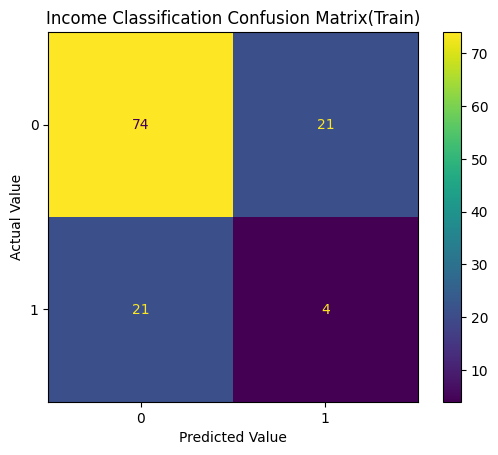

In [38]:
# Confusion Matrix - Heat Map
cm = skmet.confusion_matrix(Y_test, pred_test)
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ['Good', 'Risky'])
cmplot.plot()
cmplot.ax_.set(title = 'Income Classification Confusion Matrix(Train)', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

## Hyperparameter Optimization

In [39]:
# create a dictionary of all hyperparameters to be experimented
param_grid = {'criterion' : ['gini', 'entropy'], 'max_depth': np.arange(3, 15)}

# Decision tree model
dtree_model = DT()

# GridsearchCV with cross-validation to perform experiments with parameters set
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1 )

In [40]:
# Train
dtree_gscv.fit(X, Y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy', verbose=1)

In [41]:
# The best set of parameter values
dtree_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [42]:
# Model with best parameter values
DT_best = dtree_gscv.best_estimator_
DT_best

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [43]:
# Prediction on Test Data

preds1 = DT_best.predict(X_test)
preds1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [44]:
pd.crosstab(Y_test, preds1, rownames = ['Actual'], colnames= ['Predictions']) 

Predictions,Good,Risky
Actual,,
Good,95,0
Risky,24,1


In [45]:
# Accuracy
print(accuracy_score(Y_test, preds1))

0.8


[Text(0.5, 1.0, 'Sales Classification Confusion Matrix(Train)'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

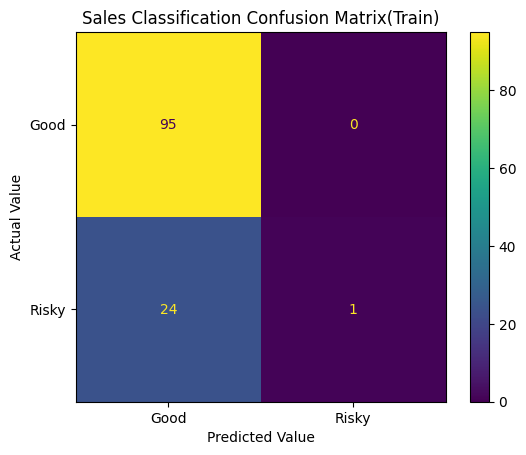

In [46]:
# Confusion Matrix - Heat Map
cm = skmet.confusion_matrix(Y_test, preds1)
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Good', 'Risky'])
cmplot.plot()
cmplot.ax_.set(title = 'Sales Classification Confusion Matrix(Train)', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [47]:
import os
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

In [48]:
predictors = list(X.columns)
type(predictors)

list

In [49]:
dot_data = tree.export_graphviz(DT_best, filled = True, 
                                rounded = True,
                                feature_names = predictors,
                                class_names = ['Good', "Risky"],
                                out_file = None)

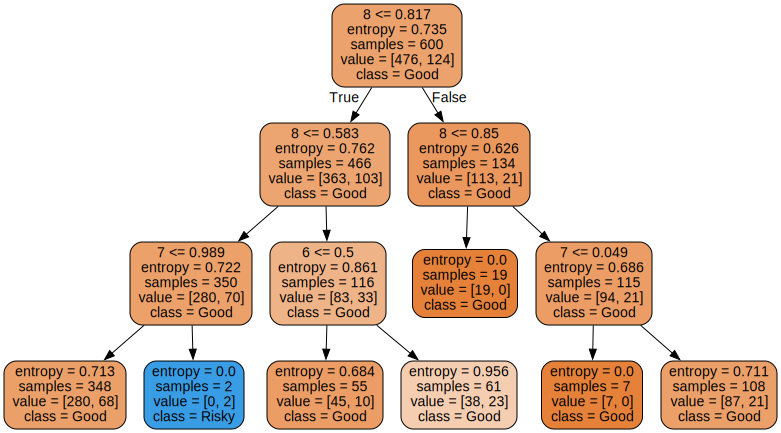

In [50]:
graph = graphviz.Source(dot_data)
graph

In [51]:
# Prediction on Train Data

preds_train = DT_best.predict(X_train)
preds_train

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [52]:
# Confusion Matrix
pd.crosstab(Y_train, preds_train, rownames = ['Actual'], colnames = ['Predictions']) 

Predictions,Good,Risky
Actual,,
Good,381,0
Risky,98,1


In [53]:
# Accuracy

print(accuracy_score(Y_train, preds_train))

0.7958333333333333


[Text(0.5, 1.0, 'Sales Classification Confusion Matrix(Train)'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

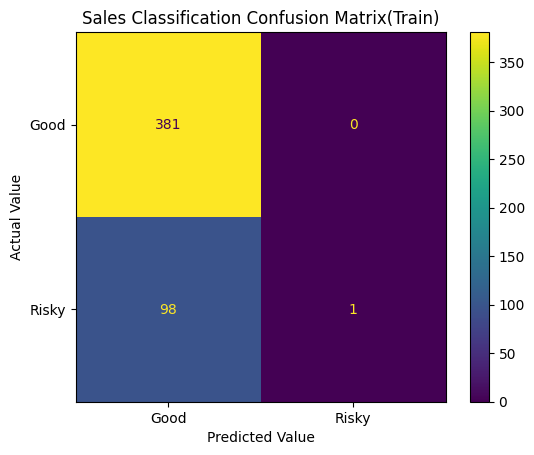

In [54]:
# Confusion Matrix - Heat Map
cm = skmet.confusion_matrix(Y_train, preds_train)
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Good', 'Risky'])
cmplot.plot()
cmplot.ax_.set(title = 'Sales Classification Confusion Matrix(Train)', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

## Model Training with Cross Validation

In [55]:
from sklearn.model_selection import cross_validate


def cross_validation(model, _X, _y, _cv=5):
    
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
          This is the machine learning algorithm to be used for training.
    _X: array
       This is the matrix of features.
    _y: array
       This is the target variable.
    _cv: int, default=5
      Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                           X=_X,
                           y=_y,
                           cv=_cv,
                           scoring=_scoring,
                           return_train_score=True)

    return pd.DataFrame({"Training Accuracy scores": results['train_accuracy'],
          "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          "Training Precision scores": results['train_precision'],
          "Mean Training Precision": results['train_precision'].mean(),
          "Training Recall scores": results['train_recall'],
          "Mean Training Recall": results['train_recall'].mean(),
          "Training F1 scores": results['train_f1'],
          "Mean Training F1 Score": results['train_f1'].mean(),
          "Validation Accuracy scores": results['test_accuracy'],
          "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
          "Validation Precision scores": results['test_precision'],
          "Mean Validation Precision": results['test_precision'].mean(),
          "Validation Recall scores": results['test_recall'],
          "Mean Validation Recall": results['test_recall'].mean(),
          "Validation F1 scores": results['test_f1'],
          "Mean Validation F1 Score": results['test_f1'].mean()
          })

In [56]:
from sklearn.preprocessing import LabelEncoder  # labelencoder is applied for target variable
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(Y_train)

label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))

print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
print("Label Encoded Target Variable", encoded_y, sep="\n")

Mapping of Label Encoded Classes
{'Good': 0, 'Risky': 1}
Label Encoded Target Variable
[0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0
 0 1 0 1 0 0 

In [57]:
decision_tree_result = cross_validation(DT_best, X_train, encoded_y, 5)
decision_tree_result

,Training Accuracy scores,Mean Training Accuracy,Training Precision scores,Mean Training Precision,Training Recall scores,Mean Training Recall,Training F1 scores,Mean Training F1 Score,Validation Accuracy scores,Mean Validation Accuracy,Validation Precision scores,Mean Validation Precision,Validation Recall scores,Mean Validation Recall,Validation F1 scores,Mean Validation F1 Score
0,0.799479,79.791667,1.0,0.8,0.037500,0.020158,0.072289,0.039211,0.791667,78.75,0.0,0.0,0.0,0.0,0.0,0.0
1,0.799479,79.791667,1.0,0.8,0.025316,0.020158,0.049383,0.039211,0.791667,78.75,0.0,0.0,0.0,0.0,0.0,0.0
2,0.794271,79.791667,0.0,0.8,0.000000,0.020158,0.000000,0.039211,0.791667,78.75,0.0,0.0,0.0,0.0,0.0,0.0
3,0.799479,79.791667,1.0,0.8,0.025316,0.020158,0.049383,0.039211,0.770833,78.75,0.0,0.0,0.0,0.0,0.0,0.0
4,0.796875,79.791667,1.0,0.8,0.012658,0.020158,0.025000,0.039211,0.791667,78.75,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

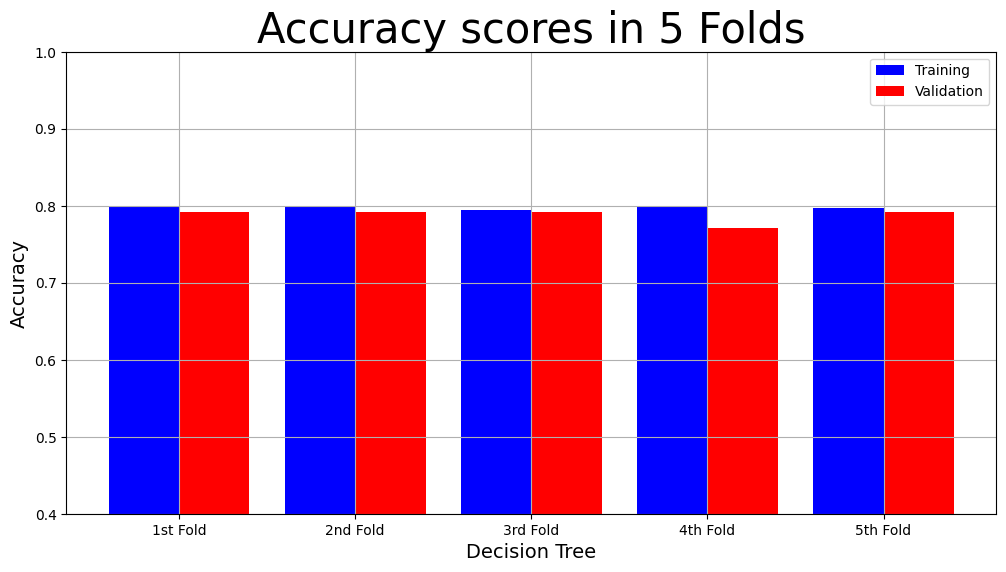

In [59]:
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

## Random Forest Classifier

In [60]:
# creating random forest classifier
clf = RandomForestClassifier(n_estimators = 100)

In [61]:
# Training the model on the training dataset
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [62]:
# predictions on the test dataset
y_pred = clf.predict(X_test)
y_pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
 

In [63]:
print(accuracy_score(Y_test, y_pred))

0.7666666666666667


[Text(0.5, 1.0, 'Sales Classification Confusion Matrix(Train)'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

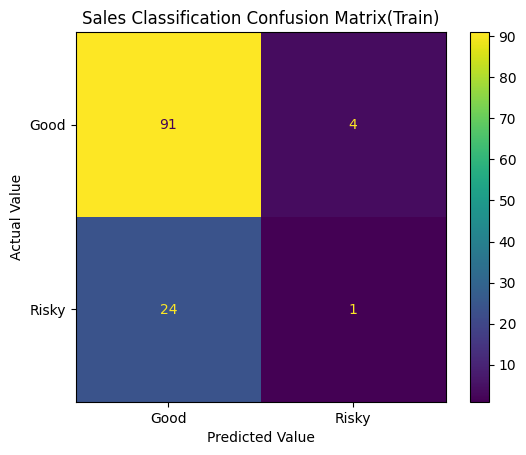

In [64]:
# Confusion Matrix - Heat Map
cm = skmet.confusion_matrix(Y_test, y_pred)
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Good', 'Risky'])
cmplot.plot()
cmplot.ax_.set(title = 'Sales Classification Confusion Matrix(Train)', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')